In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df= pd.read_csv('case2data.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Year                          72 non-null     int64
 1   Month                         72 non-null     int64
 2   Relative Interest CraftBeer   72 non-null     int64
 3   Relative Interest Whiskey     72 non-null     int64
 4   Relative Interest white wine  72 non-null     int64
dtypes: int64(5)
memory usage: 2.9 KB


In [66]:
df.head()

,Year,Month,Relative Interest CraftBeer,Relative Interest Whiskey,Relative Interest white wine
0,2010,1,6,41,54
1,2010,2,9,42,54
2,2010,3,15,44,58
3,2010,4,12,41,52
4,2010,5,17,39,61


In [67]:
df.describe()

,Year,Month,Relative Interest CraftBeer,Relative Interest Whiskey,Relative Interest white wine
count,72.00000,72.000000,72.000000,72.000000,72.000000
mean,2012.50000,6.500000,43.722222,60.430556,72.694444
std,1.71981,3.476278,24.405161,13.787958,9.181486
min,2010.00000,1.000000,6.000000,36.000000,50.000000
25%,2011.00000,3.750000,22.000000,51.750000,67.000000
50%,2012.50000,6.500000,43.000000,60.500000,73.000000
75%,2014.00000,9.250000,66.000000,67.000000,79.000000
max,2015.00000,12.000000,100.000000,100.000000,100.000000


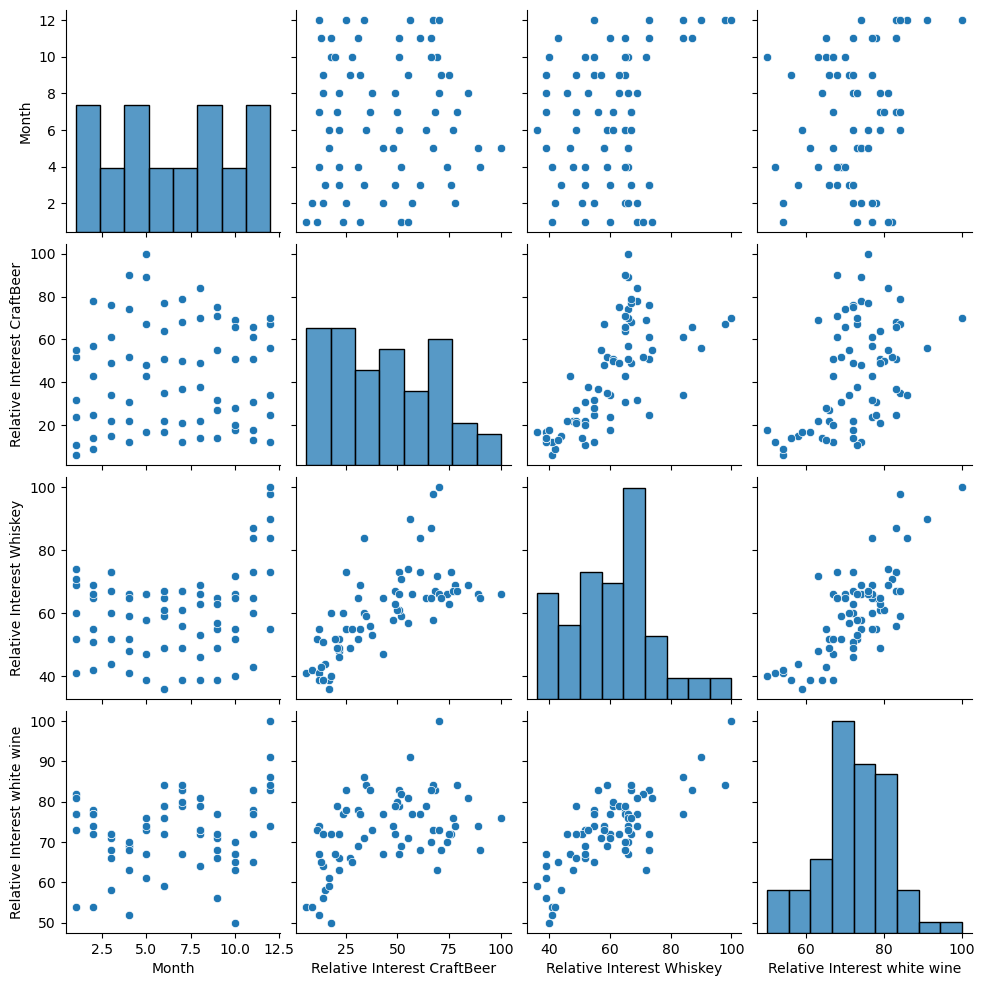

In [68]:
sns.pairplot(df,vars=['Month', 'Relative Interest CraftBeer','Relative Interest Whiskey', 'Relative Interest white wine'])

In [69]:
#line plot 
#3 data frame

C:\Users\krisp\AppData\Local\Temp\ipykernel_20016\396764768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Relative Interest CraftBeer'])
C:\Users\krisp\AppData\Local\Temp\ipykernel_20016\396764768.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Relative Interest Whiskey'])
C:\U

<AxesSubplot:xlabel='Relative Interest white wine', ylabel='Density'>

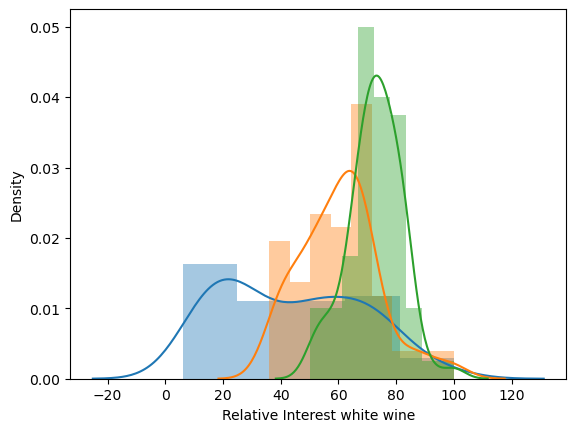

In [70]:
sns.distplot(df['Relative Interest CraftBeer'])
sns.distplot(df['Relative Interest Whiskey'])
sns.distplot(df['Relative Interest white wine'])

In [71]:
#want to create plot related with month

Text(0.5, 0, 'Interest')

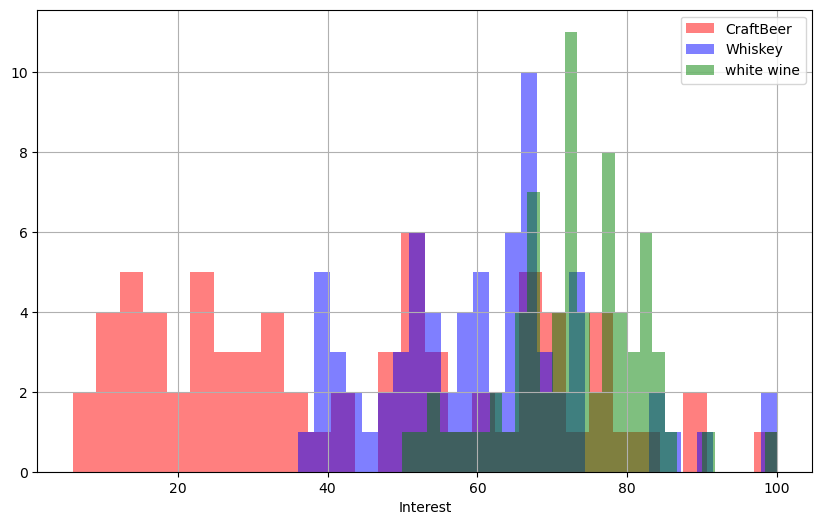

In [72]:
plt.figure(figsize=(10,6))
#df['Month']['Relative Interest CraftBeer'].hist(alpha=0.5,color='blue',
                                              #bins=30,label='Month')
df['Relative Interest CraftBeer'].hist(alpha=0.5,color='red',bins=30,label='CraftBeer')
df['Relative Interest Whiskey'].hist(alpha=0.5,color='blue',bins=30,label='Whiskey')
df['Relative Interest white wine'].hist(alpha=0.5,color='green',bins=30,label='white wine')
plt.legend()
plt.xlabel('Interest')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


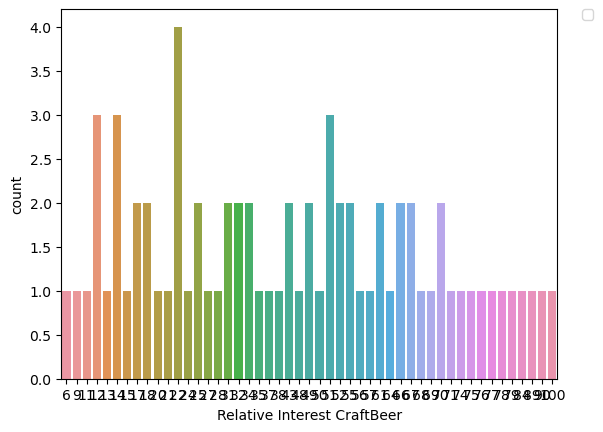

In [73]:
sns.countplot(x='Relative Interest CraftBeer', data=df)#,hue='Reason',palette='viridis')
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

In [74]:
x=df[['Year','Month','Relative Interest CraftBeer','Relative Interest Whiskey']]
y=df['Relative Interest white wine']

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(x_train,y_train)

LinearRegression()

In [79]:
print(lm.intercept_)

-203.99447679119382


In [80]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,0.122869
Month,-0.162786
Relative Interest CraftBeer,-0.086871
Relative Interest Whiskey,0.566310


In [81]:
#Interpreting the coefficients:

#Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an *increase of $21.52 *.
#Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an *increase of $164883.28 *.
#Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an *increase of $122368.67 *.
#Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an *increase of $2233.80 *.
#Holding all other features fixed, a 1 unit increase in Area Population is associated with an *increase of $15.15 *.

In [82]:
predictions = lm.predict(x_test)

In [83]:
from sklearn import metrics

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.532179254205472
MSE: 43.051053570438455
RMSE: 6.5613301677661715


In [85]:
x1=df['Relative Interest white wine'][:-1]
x2=df['Relative Interest white wine'][:-2]
x1=np.array(x1)
x2=np.array(x2)

In [86]:
df= df.iloc[1: , :]

In [87]:
df['previous1']=x1

C:\Users\krisp\AppData\Local\Temp\ipykernel_20016\967696591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous1']=x1


In [88]:
df= df.iloc[1: , :]

In [89]:
df['previous2']=x2

In [90]:
df

,Year,Month,Relative Interest CraftBeer,Relative Interest Whiskey,Relative Interest white wine,previous1,previous2
2,2010,3,15,44,58,54,54
3,2010,4,12,41,52,58,54
4,2010,5,17,39,61,52,58
5,2010,6,17,36,59,61,52
6,2010,7,12,39,67,59,61
...,...,...,...,...,...,...,...
67,2015,8,84,69,81,84,76
68,2015,9,75,63,72,81,84
69,2015,10,66,65,70,72,81
70,2015,11,66,87,83,70,72


In [91]:
X=df[['Year','Month','Relative Interest CraftBeer','Relative Interest Whiskey']]
Y=df['Relative Interest white wine']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [92]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [93]:
print(model.intercept_)

-1404.143052459824


In [94]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,0.719923
Month,-0.218671
Relative Interest CraftBeer,-0.096622
Relative Interest Whiskey,0.553896


In [95]:
predictions2 = model.predict(X_test)

In [96]:
from sklearn import metrics

In [97]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions2))
print('MSE:', metrics.mean_squared_error(Y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions2)))

MAE: 5.939607804992355
MSE: 49.86670647802153
RMSE: 7.061636246509836


In [98]:
dff=pd.read_csv("geomapcombinededit.csv")

In [99]:
dff.head()

,Region,Whiskey,White wine,CRAFT Beer
0,Nunavut,100%,0,0
1,Manitoba,78%,22%,0
2,Saskatchewan,79%,21%,0
3,Yukon Territory,70%,30%,0
4,Prince Edward Island,70%,30%,0


In [100]:
dff

,Region,Whiskey,White wine,CRAFT Beer
0,Nunavut,100%,0,0
1,Manitoba,78%,22%,0
2,Saskatchewan,79%,21%,0
3,Yukon Territory,70%,30%,0
4,Prince Edward Island,70%,30%,0
5,Alberta,60%,27%,13%
6,British Columbia,61%,32%,7%
7,Northwest Territories,75%,25%,0
8,Nova Scotia,67%,33%,0
9,Ontario,67%,33%,1%


In [111]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       13 non-null     object
 1   Whiskey      13 non-null     object
 2   White wine   13 non-null     object
 3   CRAFT Beer   13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [112]:
#dff['Whiskey'] = pd.to_numeric(dff['Whiskey'],errors = 'coerce')

In [132]:
dff["Whiskey"] = dff["Whiskey"].astype(str)
dff['White wine'] = dff['White wine'].astype(str)
dff['CRAFT Beer '] = (dff['CRAFT Beer '].astype(str)).str.replace('\%','')
dff

C:\Users\krisp\AppData\Local\Temp\ipykernel_20016\1585027610.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['CRAFT Beer '] = (dff['CRAFT Beer '].astype(str)).str.replace('\%','')


,Region,Whiskey,White wine,CRAFT Beer,White wine
0,Nunavut,100,0,0,0
1,Manitoba,78,22,0,22
2,Saskatchewan,79,21,0,21
3,Yukon Territory,70,30,0,30
4,Prince Edward Island,70,30,0,30
5,Alberta,60,27,13,27
6,British Columbia,61,32,7,32
7,Northwest Territories,75,25,0,25
8,Nova Scotia,67,33,0,33
9,Ontario,67,33,1,33


In [125]:
#dff['Whiskey'] = dff['Whiskey'].astype(str)
#dff['White wine'] = dff['White wine'].astype(str)


In [115]:
dff['Whiskey'] = dff['Whiskey'].str.replace('\%','')
dff['White wine'] = dff['White wine'].str.replace('\%','')

#dff['CRAFT Beer'] = pd.to_numeric(dff['CRAFT Beer'],errors = 'coerce')

C:\Users\krisp\AppData\Local\Temp\ipykernel_20016\2885618803.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Whiskey'] = dff['Whiskey'].str.replace('\%','')
C:\Users\krisp\AppData\Local\Temp\ipykernel_20016\2885618803.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['White wine'] = dff['White wine'].str.replace('\%','')


In [108]:
#dff['Whiskey'] = pd.to_numeric(dff['Whiskey'],errors = 'coerce')

In [116]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       13 non-null     object
 1   Whiskey      13 non-null     object
 2   White wine   13 non-null     object
 3   CRAFT Beer   13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [120]:
dff['Whiskey'] = pd.to_numeric(dff['Whiskey'],errors = 'coerce')
dff['White wine'] = pd.to_numeric(dff['White wine'],errors = 'coerce')

In [121]:
dff

,Region,Whiskey,White wine,CRAFT Beer,White wine
0,Nunavut,100,0,0,0
1,Manitoba,78,22,0,22
2,Saskatchewan,79,21,0,21
3,Yukon Territory,70,30,0,30
4,Prince Edward Island,70,30,0,30
5,Alberta,60,27,13%,27
6,British Columbia,61,32,7%,32
7,Northwest Territories,75,25,0,25
8,Nova Scotia,67,33,0,33
9,Ontario,67,33,1%,33
